In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df = pd.read_csv('train.csv')
df.shape

(22750, 9)

##### Feature Organization

In [3]:
target = "Burn Rate"
features = list(set(df.columns) - set([target]))
numerical = df[features].select_dtypes(include=np.number).columns.tolist()
categorical = [col for col in features if col not in numerical]

print(f"Target feature:\n {target}\n")
print(f"Numerical features:\n{numerical}\n")
print("Categorical features:\n", categorical)

Target feature:
 Burn Rate

Numerical features:
['Resource Allocation', 'Designation', 'Mental Fatigue Score']

Categorical features:
 ['WFH Setup Available', 'Gender', 'Employee ID', 'Company Type', 'Date of Joining']


## Distributions

##### Numerical

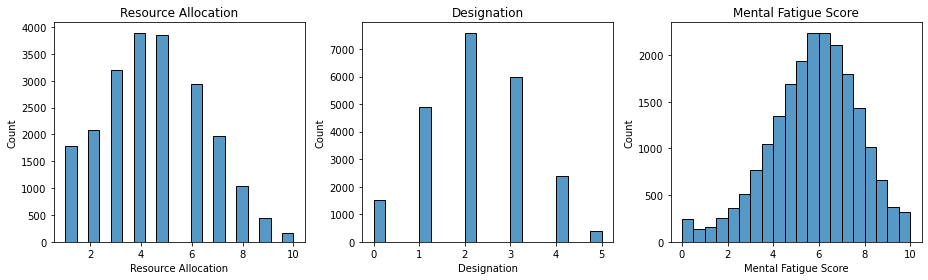

In [4]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 4))
for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i+1)
    sns.histplot(x=col, bins=20, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()   

##### Categorical

In [5]:
df[categorical].nunique()

WFH Setup Available        2
Gender                     2
Employee ID            22750
Company Type               2
Date of Joining          366
dtype: int64

In [6]:
plotable_categorical = [col for col in categorical if df[categorical][col].nunique() < 10]
print(f"Plotable Categorical features:\n {plotable_categorical}\n")

Plotable Categorical features:
 ['WFH Setup Available', 'Gender', 'Company Type']



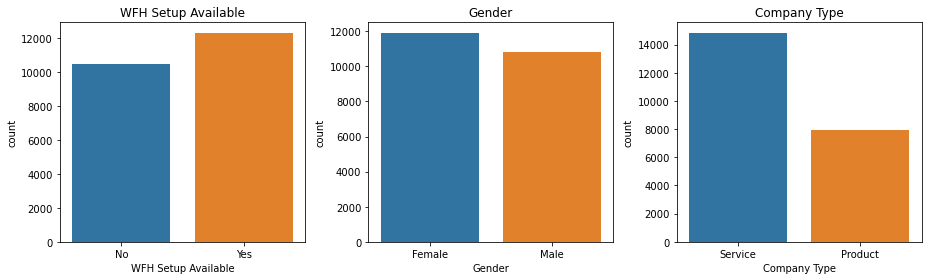

In [7]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 4))
for i, col in enumerate(plotable_categorical):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show() 

## Relations between features

##### Numerical vs Numerical

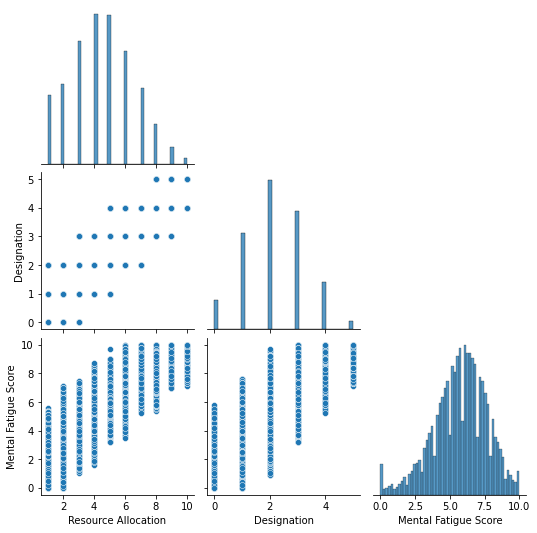

In [8]:
sns.pairplot(df[numerical], height=2.5, corner=True);

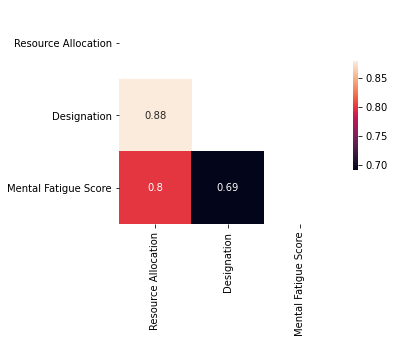

In [9]:
corr = df[numerical].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, square=True, cbar_kws={"shrink": .5});

##### Numerical vs Target

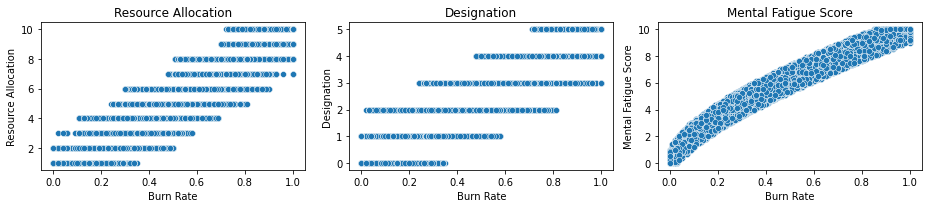

In [10]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 3))
for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(x=target, y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Preprocessing

##### NA removal

In [11]:
df.isna().sum() / df.shape[0]

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     0.060703
Mental Fatigue Score    0.093055
Burn Rate               0.049407
dtype: float64

In [12]:
df.shape

(22750, 9)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(18590, 9)

##### Splitting

In [15]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14872, 8), (3718, 8), (14872,), (3718,))

## Feature preprocessing

##### Train Set

In [16]:
from datetime import datetime

In [17]:
X_train["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_train["Date of Joining"]).year 

<ipython-input-17-5d7084c4c2fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_train["Date of Joining"]).year


In [18]:
X_train = X_train.drop(columns=["Employee ID", "Date of Joining"])
X_train.head()

,WFH Setup Available,Gender,Company Type,Resource Allocation,Designation,Mental Fatigue Score,Years in Company
19000,Yes,Male,Product,6.0,2.0,8.8,13
19405,No,Male,Service,7.0,3.0,7.1,13
9965,No,Female,Product,3.0,2.0,6.0,13
613,No,Female,Product,6.0,3.0,4.9,13
3475,No,Male,Product,1.0,0.0,0.6,13


In [19]:
X_train = pd.get_dummies(X_train, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)
X_train.head()

,Resource Allocation,Designation,Mental Fatigue Score,Years in Company,Gender_Male,Company Type_Service,WFH Setup Available_Yes
19000,6.0,2.0,8.8,13,1,0,1
19405,7.0,3.0,7.1,13,1,1,0
9965,3.0,2.0,6.0,13,0,0,0
613,6.0,3.0,4.9,13,0,0,0
3475,1.0,0.0,0.6,13,1,0,0


In [20]:
X_train.describe()

,Resource Allocation,Designation,Mental Fatigue Score,Years in Company,Gender_Male,Company Type_Service,WFH Setup Available_Yes
count,14872.000000,14872.000000,14872.000000,14872.0,14872.000000,14872.000000,14872.000000
mean,4.486148,2.179263,5.726668,13.0,0.476062,0.654250,0.540075
std,2.046352,1.134078,1.923612,0.0,0.499443,0.475628,0.498408
min,1.000000,0.000000,0.000000,13.0,0.000000,0.000000,0.000000
25%,3.000000,1.000000,4.600000,13.0,0.000000,0.000000,0.000000
50%,4.000000,2.000000,5.900000,13.0,0.000000,1.000000,1.000000
75%,6.000000,3.000000,7.100000,13.0,1.000000,1.000000,1.000000
max,10.000000,5.000000,10.000000,13.0,1.000000,1.000000,1.000000


In [21]:
X_train = X_train.drop(columns=["Years in Company"])
X_train.head()

,Resource Allocation,Designation,Mental Fatigue Score,Gender_Male,Company Type_Service,WFH Setup Available_Yes
19000,6.0,2.0,8.8,1,0,1
19405,7.0,3.0,7.1,1,1,0
9965,3.0,2.0,6.0,0,0,0
613,6.0,3.0,4.9,0,0,0
3475,1.0,0.0,0.6,1,0,0


##### Test Set

In [22]:
X_test["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_test["Date of Joining"]).year 

<ipython-input-22-f98bf03a22ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_test["Date of Joining"]).year


In [23]:
X_test = X_test.drop(columns=["Employee ID", "Date of Joining"])

In [24]:
X_test = pd.get_dummies(X_test, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

In [25]:
X_test = X_test.drop(columns=["Years in Company"])

In [26]:
X_test.head()

,Resource Allocation,Designation,Mental Fatigue Score,Gender_Male,Company Type_Service,WFH Setup Available_Yes
8815,2.0,1.0,3.9,1,1,1
10896,4.0,2.0,5.2,1,1,1
16049,4.0,3.0,4.6,1,1,0
1746,4.0,2.0,6.8,0,1,1
5473,9.0,4.0,7.8,1,1,1


In [27]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True])

## Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train_norm = mm_scaler.transform(X_train)

In [31]:
X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,0,1,2,3,4,5
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.387350,0.435853,0.572667,0.476062,0.654250,0.540075
std,0.227372,0.226816,0.192361,0.499443,0.475628,0.498408


In [32]:
X_train_norm.columns = X_train.columns

In [33]:
X_train_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Resource Allocation,Designation,Mental Fatigue Score,Gender_Male,Company Type_Service,WFH Setup Available_Yes
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.387350,0.435853,0.572667,0.476062,0.654250,0.540075
std,0.227372,0.226816,0.192361,0.499443,0.475628,0.498408


##### Test Set

In [34]:
mm_scaler.fit(X_test)

MinMaxScaler()

In [35]:
X_test_norm = mm_scaler.transform(X_test)

In [36]:
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,0,1,2,3,4,5
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,0.387574,0.435987,0.575420,0.47418,0.657343,0.537386
std,0.226566,0.225914,0.190834,0.49940,0.474662,0.498667


In [37]:
X_test_norm.columns = X_test.columns

In [38]:
X_test_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Resource Allocation,Designation,Mental Fatigue Score,Gender_Male,Company Type_Service,WFH Setup Available_Yes
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,0.387574,0.435987,0.575420,0.47418,0.657343,0.537386
std,0.226566,0.225914,0.190834,0.49940,0.474662,0.498667


# Fitting to Model

In [39]:
from sklearn import metrics

In [40]:
def evaluate_reg_set(reg, X, y):
    y_pred = reg.predict(X)    
    RMSE = metrics.mean_squared_error(y, y_pred, squared=False)
    r2 = metrics.r2_score(y, y_pred)
    return RMSE, r2

In [41]:
def evaluate_reg_model(reg, X_train, y_train, X_test, y_test):
    RMSE_train, r2_train = evaluate_reg_set(reg, X_train, y_train)
    RMSE_test, r2_test = evaluate_reg_set(reg, X_test, y_test)
    
    print(f"Regression Model: {reg}\n")
    print("Train Metrics:")
    print(f"RMSE: {RMSE_train}")
    print(f"R2: {r2_train}\n")
    print("Test Metrics:")
    print(f"RMSE: {RMSE_test}")
    print(f"R2: {r2_test}")

##### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
evaluate_reg_model(linear_reg, X_train, y_train, X_test, y_test)

Regression Model: LinearRegression()

Train Metrics:
RMSE: 0.055819989005978135
R2: 0.920765848922243

Test Metrics:
RMSE: 0.05535212644687294
R2: 0.9202219777928837


###### Saving the model

In [45]:
# import pickle

In [46]:
# MODEL_FILENAME = 'stress_model.pkl'

In [47]:
# with open(MODEL_FILENAME, 'wb') as file:
#     pickle.dump(linear_reg, file)

##### Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
evaluate_reg_model(forest_reg, X_train, y_train, X_test, y_test)

Regression Model: RandomForestRegressor()

Train Metrics:
RMSE: 0.04363427916132312
R2: 0.9515840422221119

Test Metrics:
RMSE: 0.05805427066208025
R2: 0.912242752580365
